In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import VotingClassifier

In [9]:
titanic_df = pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')


In [10]:
print(titanic_df.head())
print(titanic_df.info())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

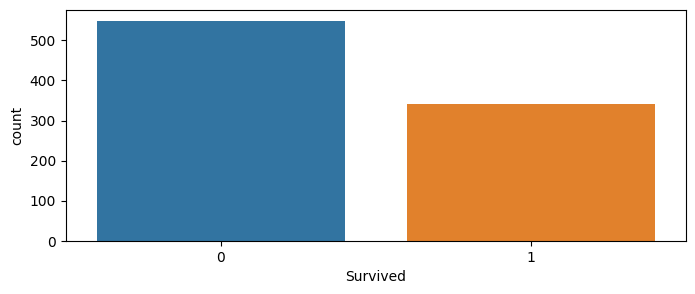

In [13]:
# Affichage de la répartition des survivants
plt.figure(figsize=(8, 3))
sns.countplot(x='Survived', data=titanic_df)
plt.show()

In [15]:
# Vérification des valeurs manquantes dans le jeu de données
print(titanic_df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [16]:
# Suppression des colonnes inutiles
data = titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)


In [17]:
# Conversion des données catégorielles en données numériques
def Categorico_a_numerico(atributo):
    atributo = atributo.astype('category')
    return atributo.astype('category').cat.codes

data['Sex'] = Categorico_a_numerico(data['Sex'])
data['Embarked'] = Categorico_a_numerico(data['Embarked'])


In [18]:
# Imputation des valeurs manquantes avec la moyenne et le mode
data = data.replace(-1, np.nan)
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Fare'] = data['Fare'].fillna(data['Fare'].mean())

In [19]:
# Normalisation des données
def Normalizacion_Amplitud(atributo):
    return (atributo - atributo.min()) / (atributo.max() - atributo.min())

for col in data.columns:
    if col != 'Survived':
        data[col] = Normalizacion_Amplitud(data[col])


In [20]:
# Division des données en ensembles d'entraînement et de test
X = data.drop(['Survived'], axis=1)
Y = data['Survived']

x_train, x_test, y_train, y_test = train_test_split(
    X, Y,
    random_state=42,
    shuffle=True,
    test_size=0.20
)

In [21]:
# Affichage des dimensions des ensembles de données
print("Dimensions de l'ensemble d'entraînement :", x_train.shape)
print("Dimensions de l'ensemble de test :", x_test.shape)


Dimensions de l'ensemble d'entraînement : (712, 7)
Dimensions de l'ensemble de test : (179, 7)


In [22]:
# Utilisation des modèles de machine learning
# Définition des modèles
models = [
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    SVC(),
    MLPClassifier()
]

In [23]:
# Entraînement des modèles et évaluation
for model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Modèle {type(model).__name__} - Accuracy: {acc}")


Modèle DecisionTreeClassifier - Accuracy: 0.770949720670391
Modèle KNeighborsClassifier - Accuracy: 0.8100558659217877
Modèle SVC - Accuracy: 0.7988826815642458
Modèle MLPClassifier - Accuracy: 0.8100558659217877


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [24]:
# Utilisation de l'ensemble de vote
ensemble_vote = VotingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                                             ('knn', KNeighborsClassifier()),
                                             ('svm', SVC()),
                                             ('mlp', MLPClassifier())],
                                  voting='hard')

ensemble_vote.fit(x_train, y_train)
y_pred_vote = ensemble_vote.predict(x_test)
acc_vote = accuracy_score(y_test, y_pred_vote)
print(f"Ensemble de vote - Accuracy: {acc_vote}")

Ensemble de vote - Accuracy: 0.8212290502793296


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
